In [1]:
import torch.nn as nn
import random
import torch
import torchvision
import numpy as np
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, Dataset
from torchsummary import summary
%matplotlib inline

In [2]:
from skimage.io import imread

In [3]:
#data_dir = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Train"
#test_data_dir = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Test"
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((150,150)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))])

#dataset = ImageFolder(data_dir,transform = normalize_transform)
#test_dataset = ImageFolder(test_data_dir,transform= normalize_transform)

In [3]:
from skimage.io import imread

In [4]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((150,150)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20),
    torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5), 
                                     std = (0.5, 0.5, 0.5))
])

#train2 = ImageFolder(data_dir,transform = transforms)

In [5]:
root = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Project\Train"

In [6]:
dataset = ImageFolder(root,transform = transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [8]:
dataset2 = ImageFolder(root,transform = transforms)
train_size2 = int(0.8 * len(dataset2))
test_size2 = len(dataset) - train_size
train_dataset2, test_dataset2 = random_split(dataset, [train_size2, test_size2])

In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
#train_loader2 = torch.utils.data.DataLoader(train_dataset2, batch_size=batch_size)
#test_loader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=batch_size)

(-0.5, 755.5, 151.5, -0.5)

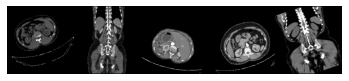

In [8]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:5], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

In [12]:
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())

KeyboardInterrupt: 

In [10]:
img, label = dataset[0]
print(img.shape,label)

torch.Size([3, 150, 150]) 0


In [12]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(resnet50, self.).__init__()
        self.model = resnet50(weights=None)
        self.classifier_layer = nn.Sequential(
            nn.Linear(1, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256 , 128),
            nn.Linear(128 , 2))
  
    def forward(self, x):
        batch_size ,_,_,_ = x.shape #taking out batch_size from input image
        x = self.model.extract_features(x)
        x = torch.nn.functional.adaptive_avg_pool2d(x,1).reshape(batch_size,-1) # then reshaping the batch_size
        x = self.classifier_layer(x)
        return x

SyntaxError: invalid syntax (626259141.py, line 3)

In [9]:
from torchvision.models import resnet50

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = CNN().to(device)
model = resnet50(weights=None)
modules = list(model.children())[:-2]      # delete the last fc layer.
model.fc = nn.Linear(2048 , 2)
"""model = nn.Sequential(
            *modules,
            nn.Linear(2048 , 1000)
            )
for param in model.parameters():
    param.requires_grad = False"""

'model = nn.Sequential(\n            *modules,\n            nn.Linear(2048 , 1000)\n            )\nfor param in model.parameters():\n    param.requires_grad = False'

In [11]:
model = model.to(device)

In [12]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
summary(model, (3, 150, 150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 75, 75]           9,408
       BatchNorm2d-2           [-1, 64, 75, 75]             128
              ReLU-3           [-1, 64, 75, 75]               0
         MaxPool2d-4           [-1, 64, 38, 38]               0
            Conv2d-5           [-1, 64, 38, 38]           4,096
       BatchNorm2d-6           [-1, 64, 38, 38]             128
              ReLU-7           [-1, 64, 38, 38]               0
            Conv2d-8           [-1, 64, 38, 38]          36,864
       BatchNorm2d-9           [-1, 64, 38, 38]             128
             ReLU-10           [-1, 64, 38, 38]               0
           Conv2d-11          [-1, 256, 38, 38]          16,384
      BatchNorm2d-12          [-1, 256, 38, 38]             512
           Conv2d-13          [-1, 256, 38, 38]          16,384
      BatchNorm2d-14          [-1, 256,

In [32]:

#Defining the model hyper parameters
num_epochs = 50
learning_rate = 0.0001
weight_decay = 0.01
weights = torch.Tensor([0.4, 0.6])
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss(size_average=True)
criterion.to(device)
#criterion = torch.nn.BCELoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

d:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [36]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
#print(labels.shape)
outputs = model(images)
labels = F.one_hot(labels, num_classes=2)
#print(torch.sigmoid(outputs))
loss = criterion(F.sigmoid(outputs), labels.float())
print(loss)
#loss = criterion(outputs, labels)

d:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(7.3331, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


In [30]:
labels = F.one_hot(labels, num_classes=2)
print(labels.shape)


torch.Size([32, 2])


In [18]:
 
#Training process begins for Normal Data
def trainmodel(model, num_epochs, loader, criterion, optimizer):
    train_loss_list = []
    train_acc = 0
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
        train_loss = 0
      
        #Iterating over the training dataset in batches
        model.train()
        for i, (images, labels) in enumerate(loader):
            #if i > 0 and i%5 == 0:
            #images, labels = mixup(images, labels, 0.2, 2)

          
            #Extracting images and target labels for the batch being iterated
            images = images.to(device)
            labels = labels.to(device)
  
            #Calculating the model output and the cross entropy loss
            outputs = model(images)
            loss = criterion(nn.Sigmoid(outputs), labels.unsqueeze(1))
  
            #Updating weights according to calculated loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() 
            _, y_pred = torch.max(outputs.data, 1)

            #Comparing predicted and true labels
            train_acc += (y_pred == labels).sum().item()
      
        print(f"Train set accuracy = {100 * train_acc / len(loader)} %")
      
        #Printing loss for each epoch
        train_loss_list.append(train_loss/len(loader))
        print(f"Training loss = {train_loss_list[-1]}")   
      
    #Plotting loss for all epochs
    plt.plot(range(1,num_epochs+1), train_loss_list)
    plt.xlabel("Number of epochs")
    plt.ylabel("Training loss")
    return


In [52]:
def trainmodel(model, num_epochs, loader, criterion, optimizer):
    correct = 0
    total = 0
    train_loss_list = []
    for epoch in range(num_epochs):
        train_loss = 0
        for i, (images, labels) in enumerate(loader):
            images = images.to(device)
            labels = labels.to(device)
            y_true = labels.to(device)
  
            outputs = model(images)
            labels = F.one_hot(labels, num_classes=2)
            loss = criterion(F.sigmoid(outputs), labels.float())
  
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() 
            _, predicted = torch.max(outputs.data, 1)
            total += y_true.size(0)
            correct += (predicted == y_true).sum().item()

        #Accuracy
        train_loss_list.append(train_loss/len(loader))
        accuracy = 100 * correct / total
        print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, train_loss_list[-1], accuracy))

In [53]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [54]:
trainmodel(model, num_epochs, train_loader, criterion, optimizer)

Epoch 1/50, Loss: 0.171, Accuracy: 91.514
Epoch 2/50, Loss: 0.336, Accuracy: 91.568
Epoch 3/50, Loss: 0.497, Accuracy: 91.683
Epoch 4/50, Loss: 0.656, Accuracy: 91.799
Epoch 5/50, Loss: 0.822, Accuracy: 91.745
Epoch 6/50, Loss: 0.983, Accuracy: 91.773
Epoch 7/50, Loss: 1.141, Accuracy: 91.811
Epoch 8/50, Loss: 1.291, Accuracy: 91.902


KeyboardInterrupt: 

In [27]:
def testmodel(model, loader):
    test_acc=0
    model.eval()
  
    with torch.no_grad():
        #Iterating over the training dataset in batches
        for i, (images, labels) in enumerate(loader):
          
            images = images.to(device)
            y_true = labels.to(device)
          
            #Calculating outputs for the batch being iterated
            outputs = model(images)
          
            #Calculated prediction labels from models
            _, y_pred = torch.max(outputs.data, 1)

            #Comparing predicted and true labels
            test_acc += (y_pred == y_true).sum().item()
      
        print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

In [37]:
testmodel(model, test_loader)

Test set accuracy = 100.0 %


Epoch 1/30: Training loss = 0.0033902279172425783
Epoch 2/30: Training loss = 0.003898099142368247
Epoch 3/30: Training loss = 0.01598129260889337
Epoch 4/30: Training loss = 0.02101791525938878
Epoch 5/30: Training loss = 0.0029477119034346222
Epoch 6/30: Training loss = 0.0038393500092176137
Epoch 7/30: Training loss = 0.0035941120756249932
Epoch 8/30: Training loss = 0.02788168025593807
Epoch 9/30: Training loss = 0.002895203329487744
Epoch 10/30: Training loss = 0.0033360598538476377
Epoch 11/30: Training loss = 0.0037519559620130994
Epoch 12/30: Training loss = 0.0037717258889248227
Epoch 13/30: Training loss = 0.054517928616869944
Epoch 14/30: Training loss = 0.005732485736026634
Epoch 15/30: Training loss = 0.0033967488130242822
Epoch 16/30: Training loss = 0.020961878384499016
Epoch 17/30: Training loss = 0.006022301572212937
Epoch 18/30: Training loss = 0.0029123495175560456
Epoch 19/30: Training loss = 0.0032134539478056784
Epoch 20/30: Training loss = 0.0038200943834964607
E

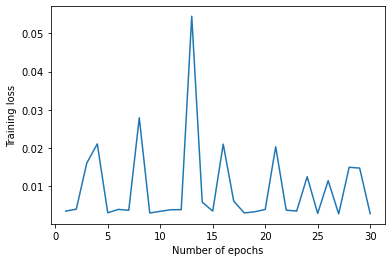

In [36]:
trainmodel(model, num_epochs, train_loader2, criterion, optimizer)

In [39]:
testmodel(model, test_loader2)

Test set accuracy = 100.0 %


In [19]:
torch.save(model.state_dict(), 'nonmixup.pth')

In [28]:
fname = 'D:\\Git\\Research Paper\\Research_Project\\projectCNN.pth'
loaded_dict = torch.load(fname)
model.load_state_dict(loaded_dict)

<All keys matched successfully>

In [21]:
images = images.to(device)
y_true = labels.to(device)
outputs = model(images)
print(outputs)

NameError: name 'images' is not defined

In [29]:
def predict_img_class(img,model):
    """ Predict the class of image and Return Predicted Class"""
    img = to_device(img.unsqueeze(0), device)
    prediction =  model(img)
    _, preds = torch.max(prediction, dim = 1)
    return dataset.classes[preds[0].item()]

In [30]:
def to_device(data, device):
    "Move data to the device"
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Class : Stone


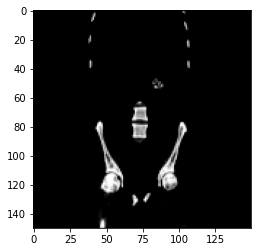

In [31]:
from PIL import Image

#open image file
img_path = "D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Test\Stone\Stone- (1100).jpg"
img = Image.open(img_path)

#convert image to tensor
img = normalize_transform(img)

#print image
plt.imshow(img.permute(1,2,0))

#prdict image label
print(f"Predicted Class : {predict_img_class(img,model)}")

Computer Vision

In [32]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

In [36]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [33]:
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)


edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)


cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

In [37]:
for c in cnts:
    	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

In [38]:
	(tl, tr, br, bl) = box
	(tltrX, tltrY) = midpoint(tl, tr)
	(blbrX, blbrY) = midpoint(bl, br)
	# compute the midpoint between the top-left and top-right points,
	# followed by the midpoint between the top-righ and bottom-right
	(tlblX, tlblY) = midpoint(tl, bl)
	(trbrX, trbrY) = midpoint(tr, br)
	# draw the midpoints on the image
	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
	# draw lines between the midpoints
	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
		(255, 0, 255), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [39]:
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / 3

In [1]:
	dimA = dA / pixelsPerMetric
	dimB = dB / pixelsPerMetric
	# draw the object sizes on the image
	cv2.putText(orig, "{:.1f}in".format(dimA),
		(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	cv2.putText(orig, "{:.1f}in".format(dimB),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	# show the output image
	cv2.imshow("Image", orig)
	cv2.waitKey(0)

NameError: name 'dA' is not defined